In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets

In [3]:
diabetes=datasets.load_diabetes()
d_X=diabetes.data

In [4]:
d_X_train=d_X[:-30]
d_X_test=d_X[30:]

In [5]:
d_y_train=diabetes.target[:-30]
d_y_test=diabetes.target[30:]

In [6]:
model=linear_model.LinearRegression()

In [7]:
model.fit(d_X_train,d_y_train)

LinearRegression()

In [8]:
d_predicted=model.predict(d_X_test)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
print("MSE is :", mean_squared_error(d_y_test,d_predicted))

MSE is : 2901.771357334228


In [12]:
b= datasets.load_breast_cancer()
df=pd.DataFrame(b.data,columns=b.feature_names)
df['target']=b['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [14]:
A=df.drop('target', axis=1)
B=df['target']

In [15]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.30,random_state=101)

In [16]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=3000)
model.fit(A_train,B_train)
p=model.predict(A_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print('accuracy on the set is :', accuracy_score(B_test,p))

accuracy on the set is : 0.9415204678362573


In [26]:
data=datasets.load_iris()
df=pd.DataFrame(np.c_[data['data'], data['target']], columns= data['feature_names']+['target'] )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [19]:
x=data.data
y=data.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [21]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier(criterion='entropy')
m.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_p=m.predict(x_test)

In [23]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [24]:
print('accuracy on the set is :',accuracy_score(y_test,y_p))

accuracy on the set is : 0.9736842105263158


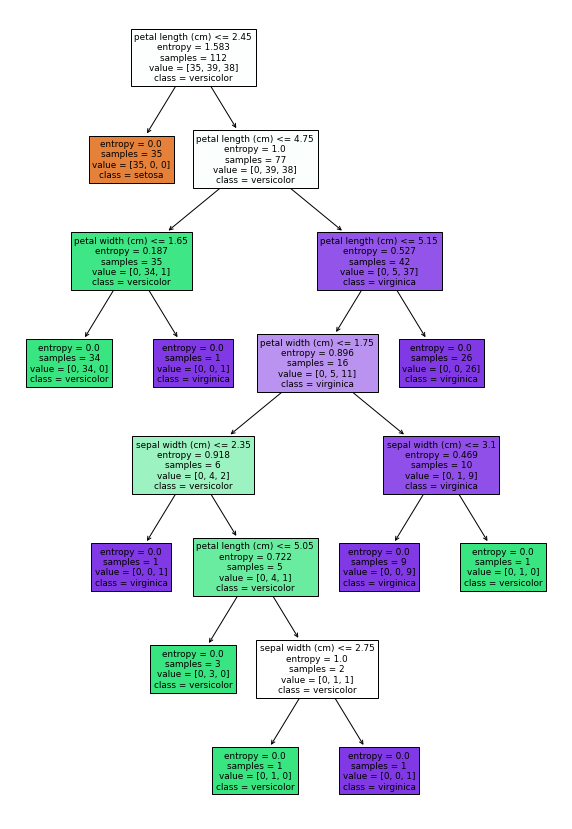

In [25]:
from sklearn import tree
fig=plt.figure(figsize=(10,15))
k=tree.plot_tree(m,
                feature_names=data.feature_names,
                class_names=data.target_names,
                filled=True)

In [27]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

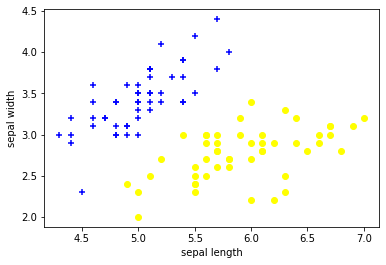

In [28]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='yellow',marker='o')

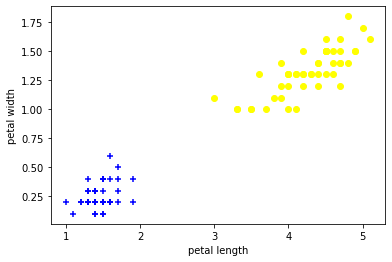

In [29]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='yellow',marker='o')

In [30]:
x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.svm import SVC
model=SVC(kernel='linear', random_state=32, C=1)

In [45]:
model.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=32)

In [46]:
model.score(x_test,y_test)

1.0

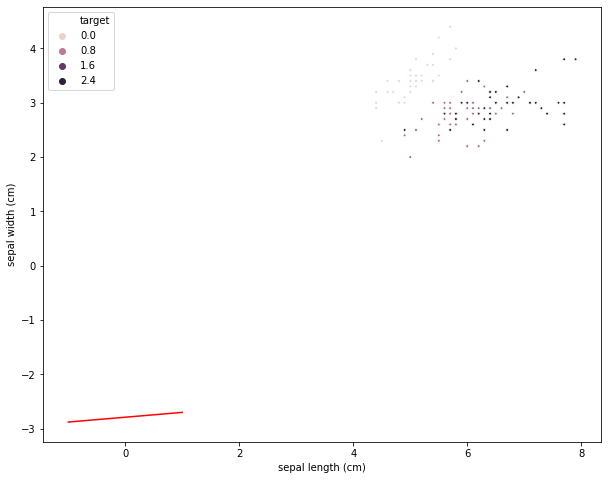

In [47]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=x_train.iloc[:, 0], 
                y=x_train.iloc[:, 1], 
                hue=y_train, 
                s=8);

#constructing hyperplane
w = model.coef_[0]         
b = model.intercept_[0]     
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[1]) * x_points - b / w[1] 

plt.plot(x_points, y_points, c='r')